Dados originais:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Variância de cada coluna:
PassengerId    14595.166667
Pclass             0.708690
Age              201.106695
SibSp              0.804178
Parch              0.

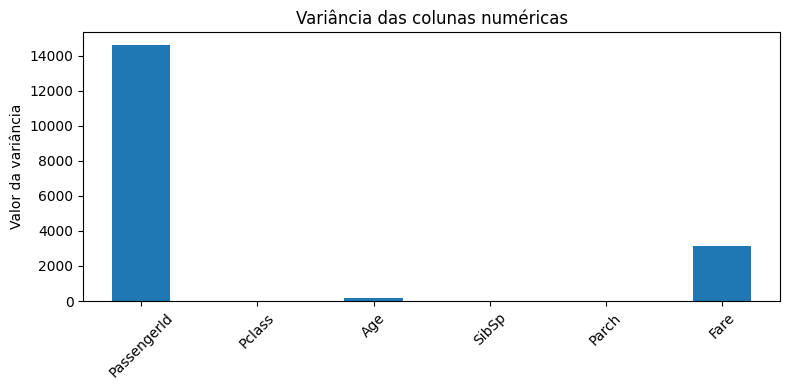


Threshold automático (média das variâncias): 2987.4011

Colunas mantidas após VarianceThreshold:
Index(['PassengerId', 'Fare'], dtype='object')

Matriz de correlação:
             PassengerId      Fare
PassengerId     1.000000  0.008211
Fare            0.008211  1.000000


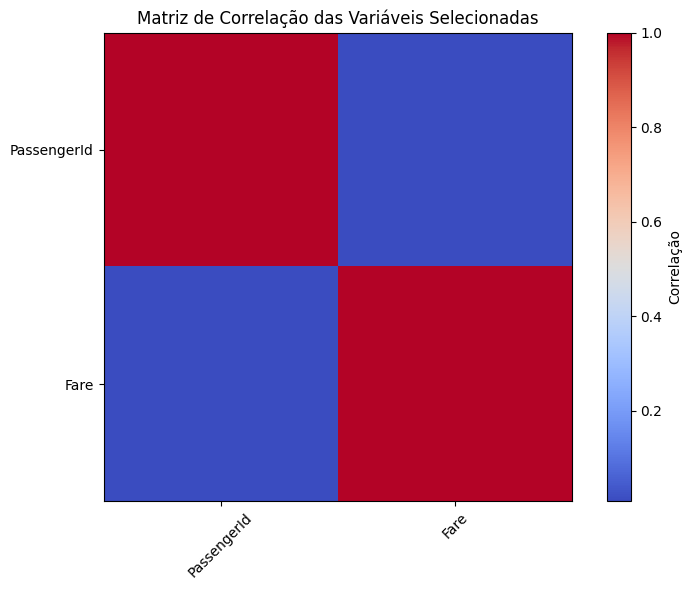

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# 1️⃣ Carregar o dataset Titanic
df = pd.read_csv('titanic.csv')
print("Dados originais:")
print(df.head())

# 2️⃣ Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['number'])

# 3️⃣ Calcular a variância de cada coluna
variancias = df_num.var()
print("\nVariância de cada coluna:")
print(variancias)

# 4️⃣ Visualizar a distribuição das variâncias
plt.figure(figsize=(8,4))
variancias.plot(kind='bar')
plt.title('Variância das colunas numéricas')
plt.ylabel('Valor da variância')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5️⃣ Escolher um threshold automático (exemplo: média das variâncias)
threshold_auto = variancias.mean()
print(f"\nThreshold automático (média das variâncias): {threshold_auto:.4f}")

# 6️⃣ Aplicar o filtro de variância
sel = VarianceThreshold(threshold=threshold_auto)
X_novo = sel.fit_transform(df_num)
colunas_mantidas = df_num.columns[sel.get_support()]

print("\nColunas mantidas após VarianceThreshold:")
print(colunas_mantidas)

# Novo DataFrame apenas com colunas relevantes
df_filtrado = df_num[colunas_mantidas]

# 7️⃣ Matriz de correlação
corr = df_filtrado.corr()
print("\nMatriz de correlação:")
print(corr)

# 8️⃣ Visualizar correlação (opcional)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlação')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.tight_layout()
plt.show()
